In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [6]:
fig = plt.gcf()

img = cv.imread('download.jpeg')

<Figure size 432x288 with 0 Axes>

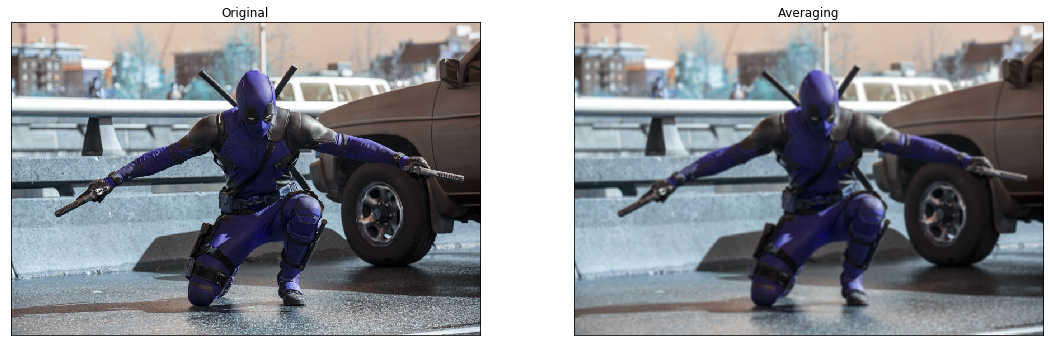

(560, 840, 3)

In [7]:
plt.gcf().set_size_inches(18.5, 10.5)

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

img.shape

In [ ]:
blur = cv.GaussianBlur(img, (5,5), 0)

cv.imshow("blur", blur)
cv.imshow("original", img)

cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display grayscale version
cv.imshow('Grayscale Image', gray)

cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
blue, green, red = cv.split(img)

In [11]:
blue_channel = np.zeros(img.shape, img.dtype)
green_channel = np.zeros(img.shape, img.dtype)
red_channel = np.zeros(img.shape, img.dtype)

cv.mixChannels([blue, green, red], [blue_channel], [0,0])
cv.mixChannels([blue, green, red], [green_channel], [1,1])
cv.mixChannels([blue, green, red], [red_channel], [2,2])

cv.imshow('Blue Channel', blue_channel)
cv.imshow('Green Channel', green_channel)
cv.imshow('Red Channel', red_channel)

cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
adjusted_image = np.zeros(img.shape, img.dtype)

alpha = 1.0
beta =100

adjusted_image = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

cv.imshow('Resulting Image', adjusted_image)

cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(img, cv.CV_8UC3)
laplacian_gray = cv.Laplacian(gray, cv.CV_8UC3)


cv.imshow('Gray Laplacian', laplacian_gray)
cv.imshow('Laplacian Filter', laplacian)
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
img_invert = cv.bitwise_not(gray)

cv.imshow('Inverted image', img_invert)
cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
img_smoothing = cv.GaussianBlur(img_invert, (5, 5),sigmaX=0, sigmaY=0)

cv.imshow('Smoothed image', img_smoothing)
cv.waitKey(0)
cv.destroyAllWindows()

In [27]:
def dodgeV2(x, y):
    return cv.divide(x, 255 - y, scale=256)

final_img = dodgeV2(gray, img_smoothing)

cv.imshow("final_img",final_img)
cv.waitKey(0)
cv.destroyAllWindows()